In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

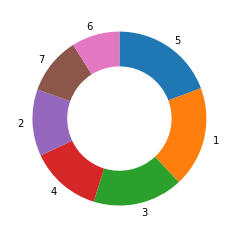

In [11]:
sorted_count = pokemon['generation_id'].value_counts()
plt.pie(sorted_count, labels=sorted_count.index, startangle=90, counterclock=False, wedgeprops={'width': 0.4});

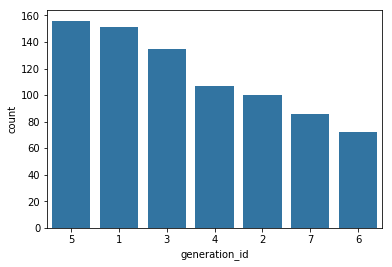

In [7]:
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

In [5]:
base_color = sb.color_palette()[0]

In [6]:
gen_order = pokemon['generation_id'].value_counts().index

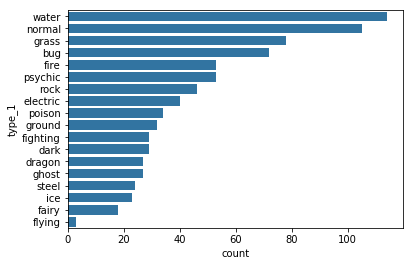

In [8]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order)

In [56]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [61]:
pkmn_types = pd.melt(pokemon, id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], var_name='type_level', value_name='type').dropna()

In [68]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

Text(0.5, 0, 'proportion')

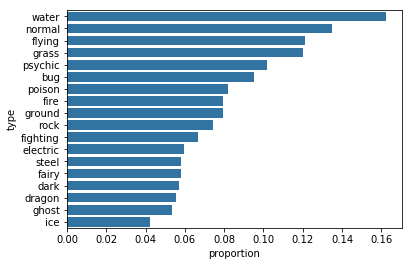

In [114]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

In [103]:
n_pokemon = pokemon.shape[0]
max_count = type_counts.max()
max_prop = max_count / n_pokemon

0.1623296158612144

In [107]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

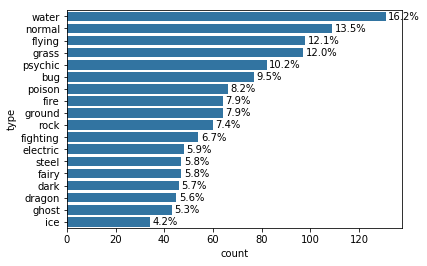

In [115]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pcb_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pcb_string, va='center')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

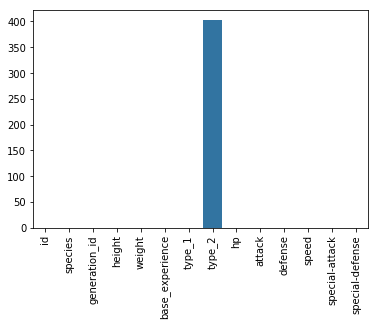

In [16]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color=base_color)
plt.xticks(rotation=90)